WEEKLY QUIZ WEEK3 위클리퀴즈 3주차입니다.

좌측상단에 파일->Drive에 사본저장->구글 드라이브에 있는 사본으로 문제푸신후 실행 제출부탁드립니다.

제출시 상단의 노트제목은 "week3_이름"으로 변경하시고 우측상단에 공유 눌러서 링크복사 후에 링크올리시면됩니다.

1.주어진 좌표에 마커를 표시하는 지도를 생성하는 코드를 작성하세요.

    서울 시청 (위도: 37.5665, 경도: 126.9780)
    남산타워 (위도: 37.5512, 경도: 126.9882)
    경복궁 (위도: 37.5796, 경도: 126.9770)
    잠실종합운동장 (위도: 37.5140, 경도: 127.0489)

In [ ]:
import pandas as pd
import numpy as np
import folium

dict_seoul = {}
dict_seoul["서울 시청"] = [37.5665, 126.9780]
dict_seoul["남산타워"] = [37.5512, 126.9882]
dict_seoul["경복궁"] = [37.5796, 126.9770]
dict_seoul["잠실종합운동장"] = [37.5140, 127.0489]

map = folium.Map(location = [37.5642135, 127.0016985], zoom_start = 12)
for key in dict_seoul.keys():
  folium.Marker(dict_seoul[key], popup=key).add_to(map)

map

2.다음 조건에 맞게 출력해주세요
  
    Pandas 라이브러리를 사용하여 URL에서 CSV 파일을 불러옵니다.
    데이터프레임의 결측값을 확인합니다.
    각 열에 결측값이 몇 개인지 출력합니다.

    url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

print("각 열의 결측값 : ")
print(pd.read_csv(url).isna().sum())

각 열의 결측값 : 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


3.다음 조건에 맞게 출력해주세요
  
    Pandas 라이브러리를 사용하여 URL에서 CSV 파일을 불러옵니다.
    missingno 라이브러리를 사용하여 결측값을 시각화합니다.
    seaborn 라이브러리를 사용하여 'median_house_value' 피처의 분포를 시각화합니다.

    url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

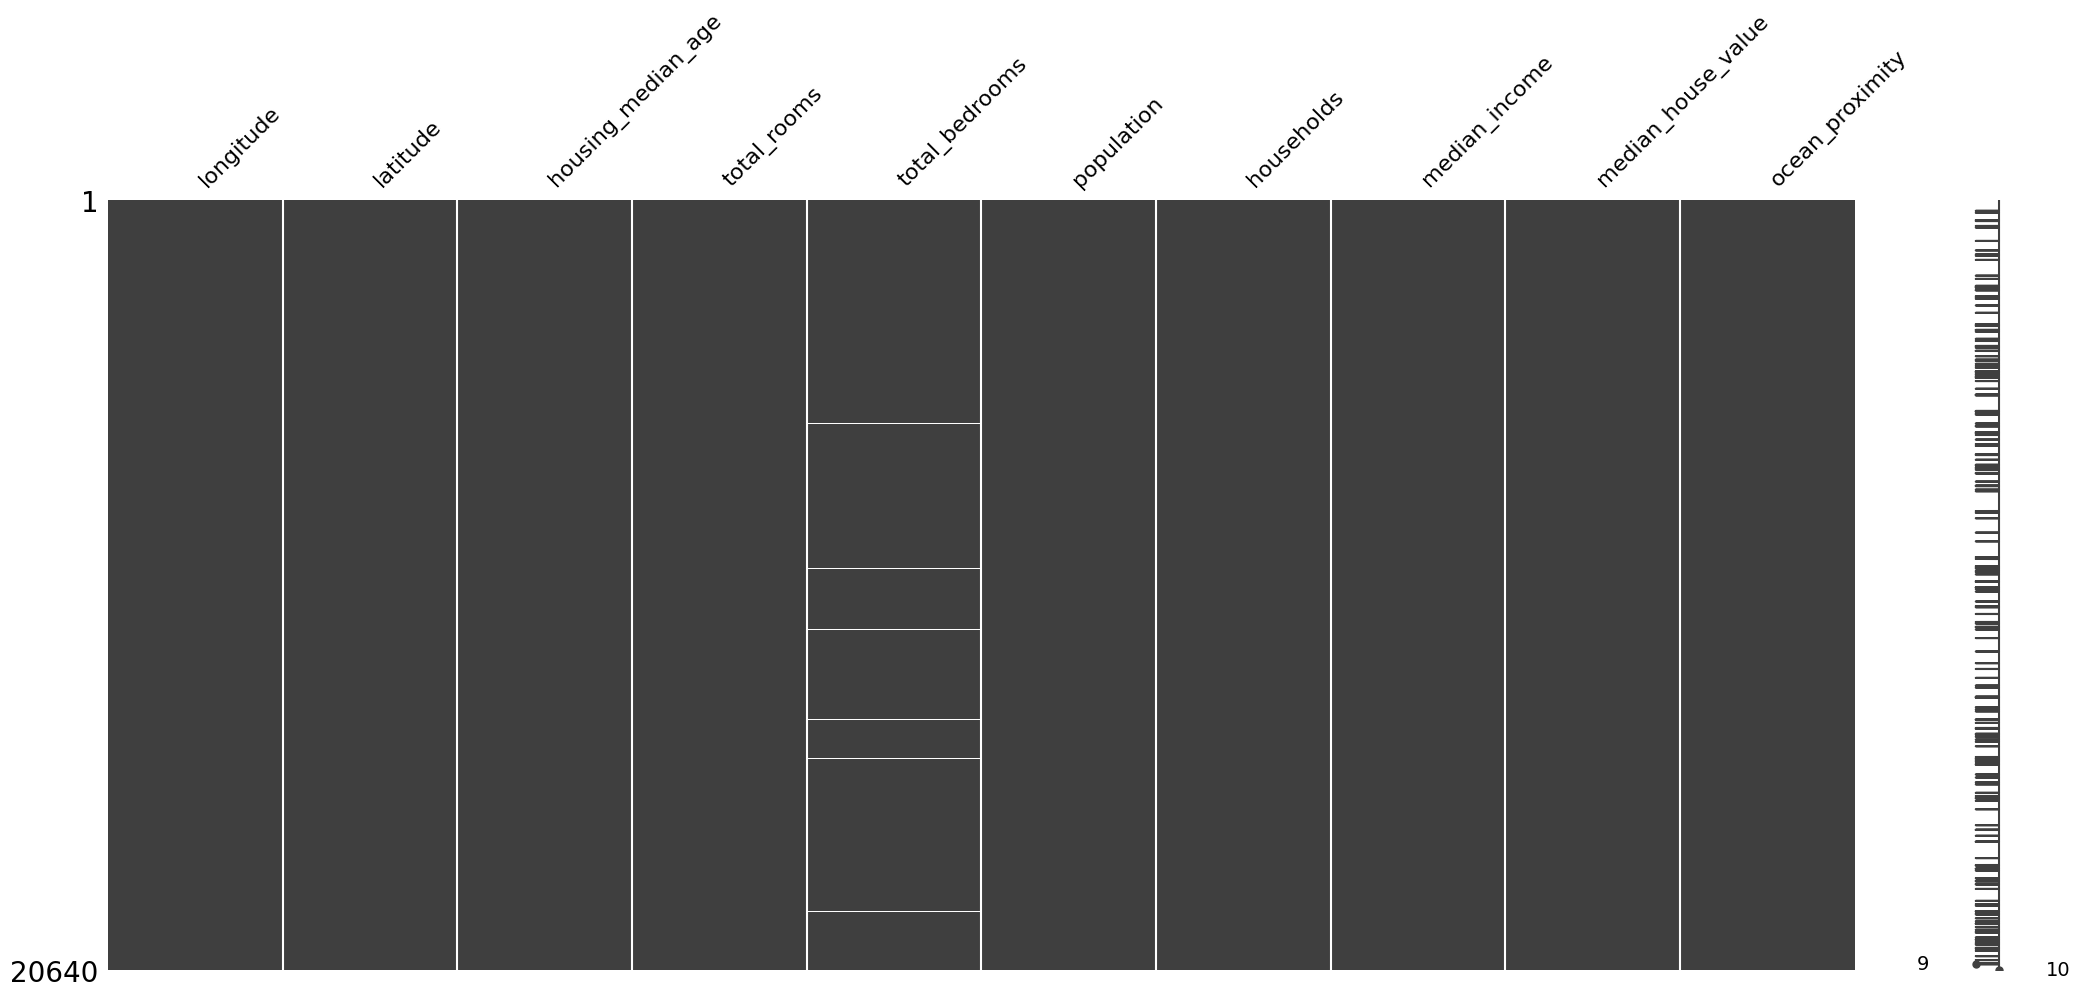

In [ ]:
import pandas as pd
import missingno as msno

url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

df = pd.read_csv(url)

msno.matrix(df);

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("seaborn")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper")
sns.set_palette("Set2")
sns.set_style("whitegrid")

<ipython-input-4-b545f474ae83>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


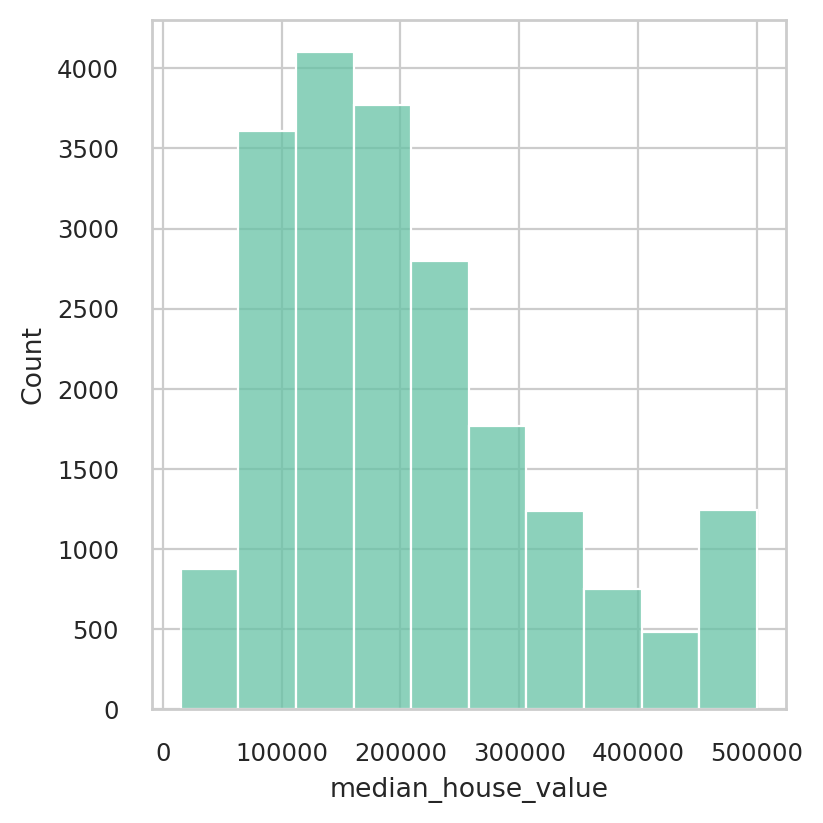

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (4,4))

sns.histplot(df["median_house_value"],bins=10,ax=ax);

4.다음 조건에 맞게 출력해주세요

    Pandas 라이브러리를 사용하여 URL에서 CSV 파일을 불러옵니다.
    이상치를 감지하고 처리하는 코드를 작성하세요. 이상치를 IQR 기반으로 감지하고, median 값으로 대체하세요.
    처리한 결과를 출력하세요.

    url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

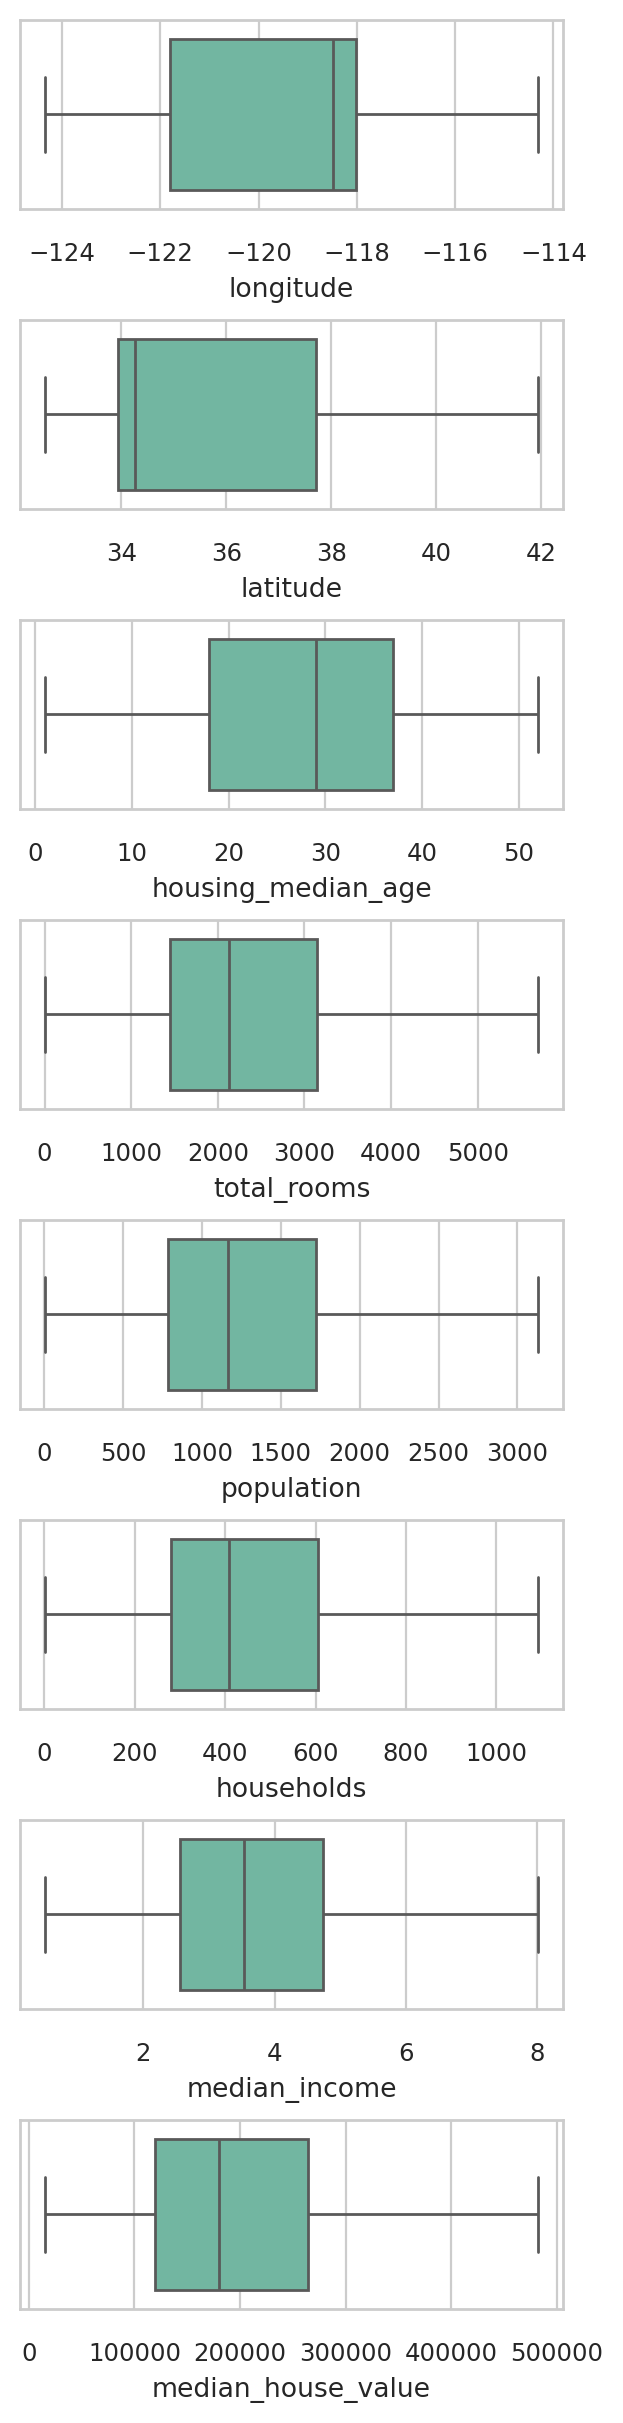

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

df.fillna(df.median, inplace=True)

def weirdo_check(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1

    # 이상치 확인
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치 보정
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    return df[col]

num_cols = df.describe().columns
fig, ax = plt.subplots(len(num_cols), 1, figsize=(3, 12))

for col in num_cols:
    df[col] = weirdo_check(df, col)

# 시각화 하여 이상치 확인해보기
for i in range(len(num_cols)):
    sns.boxplot(x=df[num_cols[i]], ax=ax[i],)
# 수염의 길이밖에 점이 있으면 이상치가 있는것!